In [8]:
import pandas as pd
import prisma_ml as prisma
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

In [3]:
df = pd.read_csv(r"../../data/Rbot/Rbot.csv")

## EDA

### Categorical

In [4]:
info = prisma.DatasetInformation(df)

info.categorical_summary()

### Categorical Columns Summary:

,Column,Unique Values Count,Top Value,Top Value Percentage
0,Protocol,11,TCP,72.07%
1,Flags,47,INT,25.48%
2,Label,3,Background,35.34%


### Column: Protocol

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,TCP,169566,72.072937
1,UDP,59212,25.167680
2,ICMP,5591,2.376419
3,ARP,537,0.228248
4,IPX/SPX,131,0.055681
5,IGMP,108,0.045905
6,PIM,66,0.028053
7,RTCP,38,0.016152
8,IPV6-ICMP,18,0.007651
9,IPV6,2,0.000850


---

### Column: Label

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Background,83147,35.341097
1,Normal,76232,32.401921
2,Rbot,75891,32.256981


---

### Numerical

### Numerical Columns Statistical Summary:

,Unnamed: 0,Duration,Packets,Bytes,Flows,Source Port,Destination Port,Bytes per Packet,Packets per Second,Bytes per Second,Is Encrypted Traffic,Common Port Usage
Mean,1.176345e+05,1.025268,8.815501,5.713385e+03,1.0,2.121579e+04,1.072348e+04,181.249759,566.419912,7.385998e+04,0.302678,0.599460
Median,1.176345e+05,0.001000,2.000000,1.240000e+02,1.0,4.669000e+03,8.000000e+01,70.000000,1000.000000,6.000000e+04,0.000000,1.000000
Mode,0.000000e+00,0.001000,1.000000,6.200000e+01,1.0,8.000000e+01,2.200000e+01,62.000000,1000.000000,6.200000e+04,0.000000,1.000000
Std Dev,6.791674e+04,1.631198,66.334909,8.091860e+04,0.0,2.320433e+04,1.946880e+04,286.606164,589.267694,3.061580e+05,0.459418,0.490009
Variance,4.612684e+09,2.660808,4400.320163,6.547820e+09,0.0,5.384411e+08,3.790343e+08,82143.093036,347236.415568,9.373270e+10,0.211065,0.240109
Range,2.352690e+05,5.029000,8077.000000,1.222661e+07,0.0,6.553300e+04,6.553300e+04,1454.000000,15999.801193,1.766332e+07,1.000000,1.000000
Min,0.000000e+00,0.001000,1.000000,6.000000e+01,1.0,0.000000e+00,0.000000e+00,60.000000,0.198807,1.232604e+01,0.000000,0.000000
Max,2.352690e+05,5.030000,8078.000000,1.222667e+07,1.0,6.553300e+04,6.553300e+04,1514.000000,16000.000000,1.766333e+07,1.000000,1.000000


### Correlation Matrix:

,Unnamed: 0,Duration,Packets,Bytes,Flows,Source Port,Destination Port,Bytes per Packet,Packets per Second,Bytes per Second,Is Encrypted Traffic,Common Port Usage
Unnamed: 0,1.000000,-0.000968,0.000800,0.000440,NaN,-0.000414,-0.001692,-0.002517,0.002359,-0.000965,0.002307,0.001838
Duration,-0.000968,1.000000,0.189910,0.115887,NaN,-0.162730,-0.044374,0.276890,-0.594998,-0.140193,0.081006,0.060794
Packets,0.000800,0.189910,1.000000,0.843405,NaN,-0.000711,0.059916,0.216474,-0.058057,0.082642,-0.053925,-0.036434
Bytes,0.000440,0.115887,0.843405,1.000000,NaN,-0.023335,0.079829,0.264243,-0.019015,0.115105,-0.039324,-0.057997
Flows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source Port,-0.000414,-0.162730,-0.000711,-0.023335,NaN,1.000000,-0.301737,-0.086424,0.057471,-0.009542,-0.182632,0.319311
Destination Port,-0.001692,-0.044374,0.059916,0.079829,NaN,-0.301737,1.000000,0.270099,0.122163,0.116063,-0.358083,-0.656339
Bytes per Packet,-0.002517,0.276890,0.216474,0.264243,NaN,-0.086424,0.270099,1.000000,-0.170549,0.236451,-0.205050,-0.223461
Packets per Second,0.002359,-0.594998,-0.058057,-0.019015,NaN,0.057471,0.122163,-0.170549,1.000000,0.477318,-0.097125,-0.135465
Bytes per Second,-0.000965,-0.140193,0.082642,0.115105,NaN,-0.009542,0.116063,0.236451,0.477318,1.000000,-0.089383,-0.104253


### Correlation Matrix Heatmap:

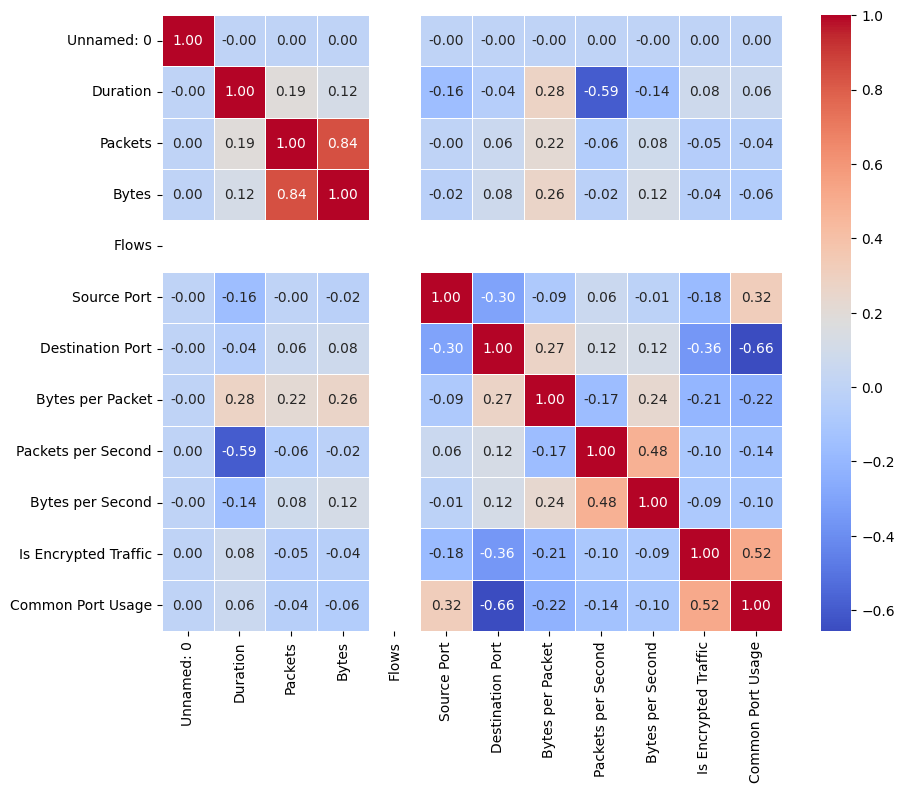

In [5]:
info.numerical_summary()

In [6]:
df.drop(["Flows", "Unnamed: 0"], axis=1, inplace=True)

## Modeling

### Final Data Prep

In [9]:
def save_as_pickle(path, variable):
    with open(path, "wb") as file:
        pickle.dump(variable, file)

#### Encoding

In [ ]:
encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ["Protocol", "Flags", "Label"]

# Apply label encoding to each column
for column in columns_to_encode:
    # Fit label encoder and return encoded labels
    path = "../../variables/Rbot/" + column + "_Encoder.pkl"
    df[column] = encoder.fit_transform(df[column])
    save_as_pickle(path, encoder)

#### Type Casting

In [ ]:
df["Bytes"] = df["Bytes"].astype("float64")
df["Duration"] = df["Duration"].astype("float64")
df["Flows"] = df["Flows"].astype("float64")
df["Packets"] = df["Packets"].astype("float64")
df = df.reset_index()

### Data Splitting

In [ ]:
# Separate the 'Status' column
label_column = df["Label"]
dropped_df = df.drop("Label", axis=1)

# Initialize and apply MinMaxScaler to the dropped_df
scaler = StandardScaler()
scaled_dropped_df = scaler.fit_transform(dropped_df.to_numpy())

# Create a DataFrame from the scaled dropped_df
df = pd.DataFrame(scaled_dropped_df, columns=dropped_df.columns)

# Reattach the 'Status' column
df["Label"] = label_column

save_as_pickle(r"../../variables/Rbot/scaler.pkl", scaler)